In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
import tensorflow as tf # tf.keras.Sequential()
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/AML_exam.txt',sep='\t',header=(0))

In [ ]:
df.head()

,Unnamed: 0,datetime,speed
0,0,201501010000,NaN
1,1,201501010100,NaN
2,2,201501010200,NaN
3,3,201501010300,NaN
4,4,201501010400,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'datetime', 'speed'], dtype='object')

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
df.dtypes

datetime      int64
speed       float64
dtype: object

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y%m%d%H%M%S')

In [ ]:
df.head()

,datetime,speed
0,2015-01-01 00:00:00,NaN
1,2015-01-01 01:00:00,NaN
2,2015-01-01 02:00:00,NaN
3,2015-01-01 03:00:00,NaN
4,2015-01-01 04:00:00,NaN


In [ ]:
#So we gonna drop the null values since they do not offer us any insights
df.dropna(inplace=True)

In [ ]:
#new shape
df.shape

(18549, 2)

In [ ]:
df

,datetime,speed
16500,2016-11-18 12:00:00,2.098724
16501,2016-11-18 13:00:00,1.570473
16502,2016-11-18 14:00:00,2.194121
16503,2016-11-18 15:00:00,1.308761
16504,2016-11-18 16:00:00,0.522000
...,...,...
35059,2018-12-31 19:00:00,2.148734
35060,2018-12-31 20:00:00,1.608662
35061,2018-12-31 21:00:00,0.647012
35062,2018-12-31 22:00:00,1.206987


In [ ]:
data = df['speed'].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(data.reshape(-1,1))

array([[0.26413294],
       [0.19765048],
       [0.27613909],
       ...,
       [0.08142909],
       [0.1519043 ],
       [0.23236036]])

In [ ]:
data = scaler.fit_transform(data.reshape(-1,1))

In [ ]:
train_size = int(len(data)*0.7)
test_size = int(len(data)*0.3)

In [ ]:
train_ = data[0:train_size]

In [ ]:
X_train = data[0:int(train_size*0.7)]
#X_train_val = train_[int(train_size*0.7):len(train_)]
X_test = data[train_size:len(data):]
X_test2 = data[train_size:len(data):]

In [ ]:
def sequences(data, step=1):
    x = []
    y = []
    for i in range(len(data)-step-1):
        window = data[i:(i+step), 0]
        x.append(window)
        y.append(data[i+step, 0])
        
    return np.array(x),np.array(y)

In [ ]:
steps = 3 # Feature extraction, we are looking 3 steps back
X_train, Y_train = sequences(X_train, steps)
X_test, Y_test = sequences(X_test, steps)
X_test1, Y_test1 = sequences(X_test2, steps)

In [ ]:
X_train.shape

(9084, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape

(9084, 1, 3)

In [ ]:
X_test.shape

(5561, 1, 3)

In [62]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256, activation='relu', return_sequences=True, input_shape=(None, steps)))
model.add(tf.keras.layers.LSTM(128, activation='relu'))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))


#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256), input_shape=(None, steps)))
#model.add(tf.keras.layers.Dense(128))
#model.add(tf.keras.layers.Dense(64))
#model.add(tf.keras.layers.Dense(32))
#model.add(tf.keras.layers.Dense(1,activation='relu'))

#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#RMSprop

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 256)         266240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 490,241
Trainable params: 490,241
Non-trainable params: 0
________________________________________________

In [63]:
history = model.fit(X_train, Y_train, verbose=2, epochs=40, validation_split=0.31, batch_size=100)

Epoch 1/40
63/63 - 4s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2/40
63/63 - 1s - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3/40
63/63 - 1s - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4/40
63/63 - 1s - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 5/40
63/63 - 1s - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 6/40
63/63 - 1s - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 7/40
63/63 - 1s - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 8/40
63/63 - 1s - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 9/40
63/63 - 1s - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 10/40
63/63 - 1s - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 11/40
63/63 - 1s - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 12/40
63/63 - 1s - loss:

In [64]:
X_train.shape

(9084, 1, 3)

In [65]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('MSE accuracy')
    plt.ylabel('Mean Square Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

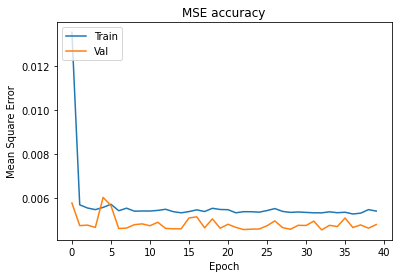

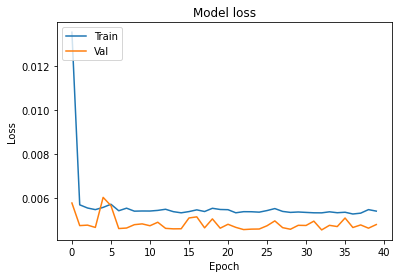

In [66]:
plot_history(history)

In [67]:
train_loss = model.evaluate(X_train, Y_train, verbose=1)

284/284 [==============================] - 1s 4ms/step - loss: 0.0052 - mse: 0.0052


In [68]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [73]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([Y_test])

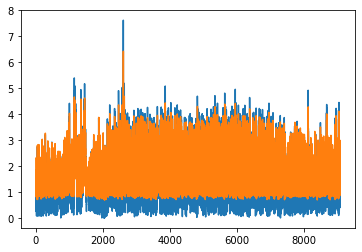

In [102]:
plt.plot(trainY[0])
plt.plot(trainPredict)

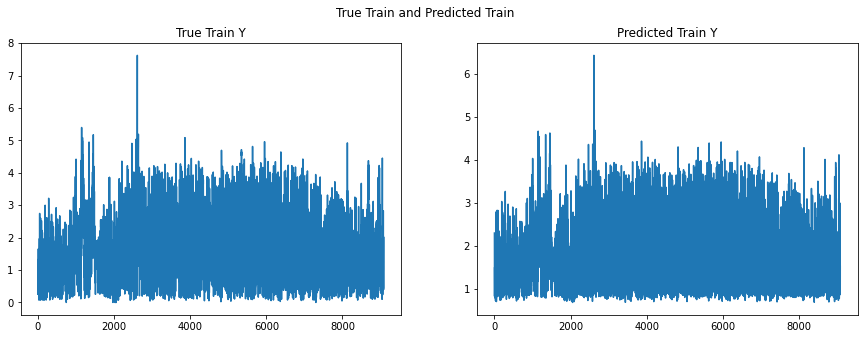

In [106]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('True Train and Predicted Train')
ax1.plot(trainY[0])
ax1.set_title('True Train Y')
ax2.plot(trainPredict)
ax2.set_title('Predicted Train Y')
fig.set_figheight(5)
fig.set_figwidth(15)

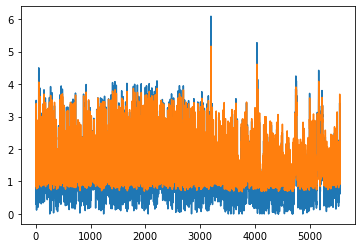

In [107]:
plt.plot(testY[0])
plt.plot(testPredict)

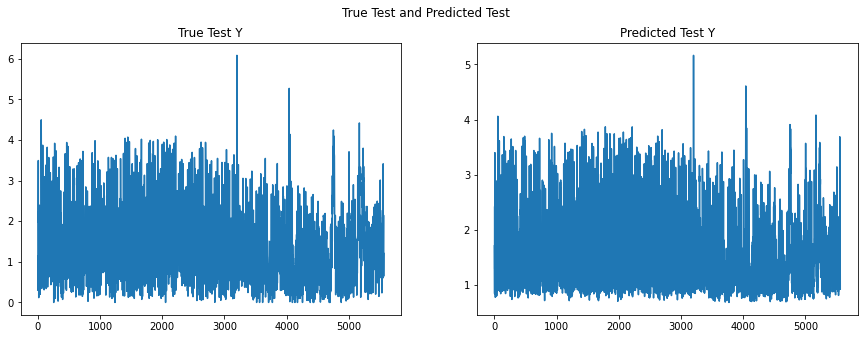

In [105]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('True Test and Predicted Test')
ax1.plot(testY[0])
ax1.set_title('True Test Y')
ax2.plot(testPredict)
ax2.set_title('Predicted Test Y')
fig.set_figheight(5)
fig.set_figwidth(15)

In [108]:
# Root mean square error between the predicted and the true values of Y
import math
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.57 RMSE


In [109]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.54 RMSE
